In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,make_scorer

In [ ]:
X,y = load_breast_cancer(return_X_y=True, as_frame = True)

In [ ]:
y = y.map({0:1, 1:0})

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
y.value_counts()

,count
target,
0,357
1,212


In [ ]:
y.value_counts() / len(y)

,count
target,
0,0.627417
1,0.372583


In [ ]:
# FNR = fn / (tp+fn)
def fnr(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred). ravel()
  FNR = fn / (tp+fn)
  return FNR

In [ ]:
fnr_score = make_scorer(fnr, greater_is_better = False, response_method='predict' )

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth=1, random_state = 0, n_jobs=4)

In [ ]:
rf_param_grid = dict(
    n_estimators = [10,20,30,100,200,500,1000,2000],
    max_depth = [1,2,3,4]
)

In [ ]:
clf = GridSearchCV(rf_model, rf_param_grid, scoring= fnr_score, cv=5)

In [ ]:
search = clf.fit(X,y)

In [ ]:
search.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

In [ ]:
results.head()

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",-0.164563,0.068712
1,"{'max_depth': 1, 'n_estimators': 20}",-0.159801,0.073267
2,"{'max_depth': 1, 'n_estimators': 30}",-0.150498,0.055340
3,"{'max_depth': 1, 'n_estimators': 100}",-0.145404,0.085822
4,"{'max_depth': 1, 'n_estimators': 200}",-0.140642,0.082462


In [ ]:
results.sort_values(by = 'mean_test_score', ascending = False, inplace = True)

In [ ]:
results.reset_index(drop=True, inplace = True)

In [ ]:
results.head()

,params,mean_test_score,std_test_score
0,"{'max_depth': 4, 'n_estimators': 100}",-0.075083,0.03968
1,"{'max_depth': 4, 'n_estimators': 1000}",-0.075083,0.03968
2,"{'max_depth': 4, 'n_estimators': 500}",-0.075083,0.03968
3,"{'max_depth': 4, 'n_estimators': 200}",-0.075083,0.03968
4,"{'max_depth': 3, 'n_estimators': 200}",-0.075083,0.03968


array([<Axes: >], dtype=object)

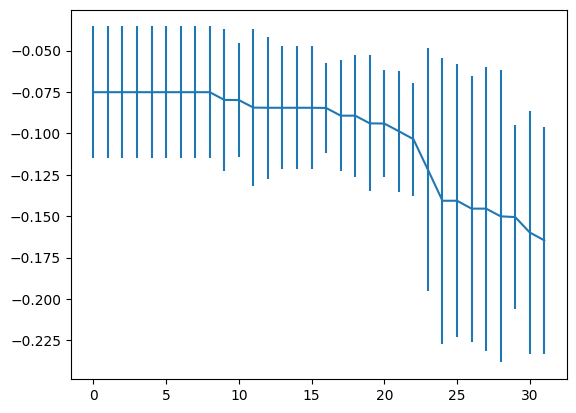

In [ ]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots = True)

Text(0.5, 0, 'Hyperparameter Space')

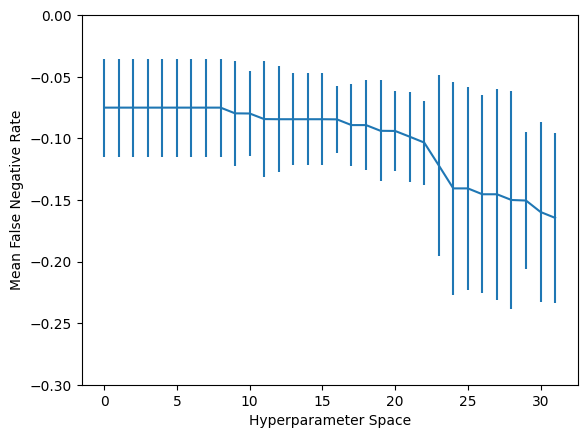

In [ ]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots = True)
plt.ylim(-0.3,0)
plt.ylabel('Mean False Negative Rate')
plt.xlabel('Hyperparameter Space')

In [ ]:
def fnr(y_true, y_pred):
  y_pred_class = np.where(y_pred > 0.37, 1, 0)
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class, labels = [0,1]). ravel()
  FNR = fn / (tp+fn)
  return FNR

In [ ]:
fnr_score = make_scorer(fnr, greater_is_better = False, response_method = 'predict_proba')

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth=1, random_state = 0, n_jobs=4)
rf_param_grid = dict(
    n_estimators = [10,20,30,100,200,500,1000,2000],
    max_depth = [1,2,3,4]
)
clf = GridSearchCV(rf_model, rf_param_grid, scoring= fnr_score, cv=5)